In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('branches.csv')

In [3]:
df.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [4]:
df.shape

(1000, 18)

In [5]:
df.columns.values.tolist()

['Unnamed: 0',
 'Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [6]:
df.describe(include=None, percentiles=None)

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,166.204000,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,96.337673,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,0.000000,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,83.000000,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,166.000000,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,249.250000,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,339.000000,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [7]:
df.isnull().sum()

Unnamed: 0                 0
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
df.notna().sum()

Unnamed: 0                 1000
Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Invoice ID               1000 non-null   object 
 2   Branch                   1000 non-null   object 
 3   City                     1000 non-null   object 
 4   Customer type            1000 non-null   object 
 5   Gender                   1000 non-null   object 
 6   Product line             1000 non-null   object 
 7   Unit price               1000 non-null   float64
 8   Quantity                 1000 non-null   int64  
 9   Tax 5%                   1000 non-null   float64
 10  Total                    1000 non-null   float64
 11  Date                     1000 non-null   object 
 12  Time                     1000 non-null   object 
 13  Payment                  1000 non-null   object 
 14  cogs                     

In [10]:
import datetime as dt

In [11]:
df['Date']= pd.to_datetime(df['Date'])

In [12]:
df['Date']

0     2019-02-20
1     2019-02-06
2     2019-03-09
3     2019-01-15
4     2019-03-11
         ...    
995   2019-01-23
996   2019-01-09
997   2019-03-29
998   2019-02-18
999   2019-01-29
Name: Date, Length: 1000, dtype: datetime64[ns]

In [13]:
type(df['Date'])

pandas.core.series.Series

In [14]:
df['Time']= pd.to_datetime(df['Time'])

In [15]:
df['Time']

0     2022-03-02 13:27:00
1     2022-03-02 18:07:00
2     2022-03-02 17:03:00
3     2022-03-02 16:19:00
4     2022-03-02 15:30:00
              ...        
995   2022-03-02 10:33:00
996   2022-03-02 11:40:00
997   2022-03-02 19:12:00
998   2022-03-02 11:40:00
999   2022-03-02 13:46:00
Name: Time, Length: 1000, dtype: datetime64[ns]

In [16]:
type(df['Time'])

pandas.core.series.Series

In [17]:
 df['Day'] = df['Date'].dt.day

In [18]:
Newday= df['Day']

In [19]:
Newday 

0      20
1       6
2       9
3      15
4      11
       ..
995    23
996     9
997    29
998    18
999    29
Name: Day, Length: 1000, dtype: int64

In [20]:
 df['Month'] = df['Date'].dt.month

In [21]:
NewMonth = df['Month']

In [22]:
NewMonth 

0      2
1      2
2      3
3      1
4      3
      ..
995    1
996    1
997    3
998    2
999    1
Name: Month, Length: 1000, dtype: int64

In [23]:
 df['Year'] = df['Date'].dt.year

In [24]:
NewYear=  df['Year']

In [25]:
NewYear

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
995    2019
996    2019
997    2019
998    2019
999    2019
Name: Year, Length: 1000, dtype: int64

In [26]:
 df['Hour'] = df['Time'].dt.hour

In [27]:
newhour=  df['Hour']

In [28]:
newhour

0      13
1      18
2      17
3      16
4      15
       ..
995    10
996    11
997    19
998    11
999    13
Name: Hour, Length: 1000, dtype: int64

In [29]:
df['Hour'].nunique()

11

In [30]:
df['Hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [31]:
#Uncomment the code and Run it
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [32]:
#Example - Uncomment the Code and Run it
df['Branch'].unique().tolist()

['B', 'A', 'C']

In [33]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [34]:
print("Total Number of unique values in the Quantity Column : {}". format(len(df['Quantity'].unique().tolist())))

Total Number of unique values in the Quantity Column : 10


In [35]:
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [36]:
City_grp = df.groupby('City').sum()

In [37]:
City_grp

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,,
Abuja,54946,6652396.8,1820,1820531.52,38231161.92,36410630.4,1580.952381,1820531.52,2263.6,5068,665,670308,5029
Lagos,57630,6705176.4,1859,1820577.78,38232133.38,36411555.6,1619.047619,1820577.78,2389.2,5232,688,686460,4987
Port Harcourt,53628,6684393.6,1831,1895463.54,39804734.34,37909270.8,1561.904762,1895463.54,2319.9,4956,640,662232,4894


In [38]:
df.groupby('City').mean()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,,
Abuja,165.5,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905,5483.528675,6.818072,15.265060,2.003012,2019.0,15.147590
Lagos,169.5,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905,5354.640529,7.027059,15.388235,2.023529,2019.0,14.667647
Port Harcourt,163.5,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905,5778.852256,7.072866,15.109756,1.951220,2019.0,14.920732


In [ ]:
#df.groupby('city').max()
df.groupby('gross income')['City'].max()

In [40]:
#df=df.groupby(['gross income', 'City']).size().sort_values(ascending=False)

In [41]:
df.groupby(['City'])['gross income'].mean().sort_values(ascending=False)

City
Port Harcourt    5778.852256
Abuja            5483.528675
Lagos            5354.640529
Name: gross income, dtype: float64

Text(0.5, 1.0, 'Sales Records')

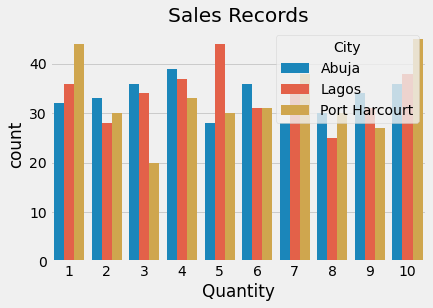

In [42]:
sns.countplot(x='Quantity', hue='City', data=df).set_title("Sales Records")

Text(0.5, 1.0, 'production record')

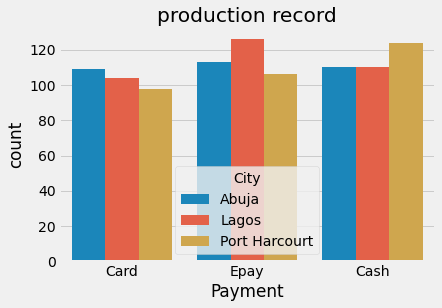

In [64]:
sns.countplot(x='Payment', hue='City', data=df).set_title("Payment Method")

Text(0.5, 1.0, 'Sales Records')

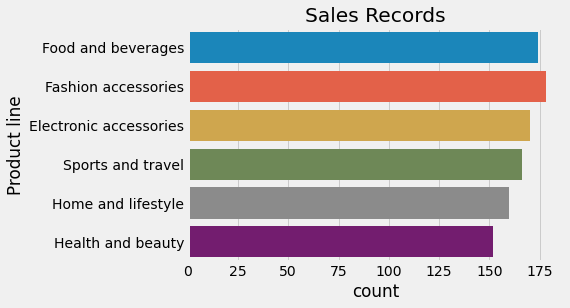

In [65]:
sns.countplot(y='Product line', data=df).set_title("Sales Records")

Text(0.5, 1.0, 'Product analysis')

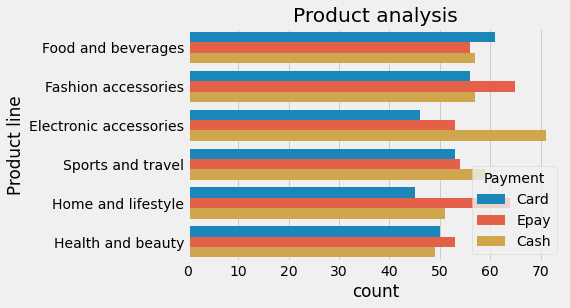

In [66]:
sns.countplot(y='Product line', hue='Payment', data=df).set_title("Product analysis")

Text(0.5, 1.0, 'Sales Records')

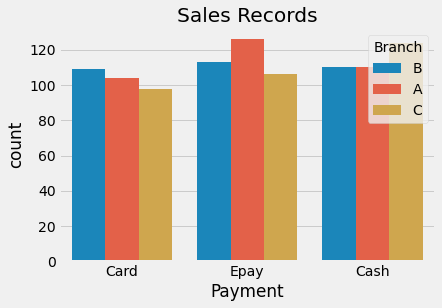

In [46]:
sns.countplot(x='Payment', hue='Branch', data=df).set_title("Sales Records")

Text(0.5, 1.0, 'Sales Records')

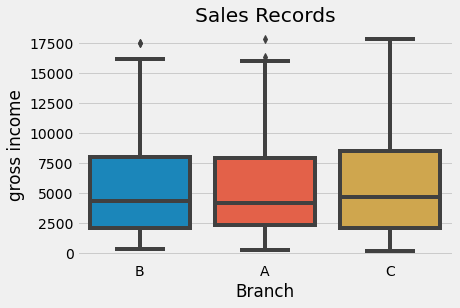

In [50]:
sns.boxplot(x='Branch', y='gross income', data=df).set_title("Sales Records")

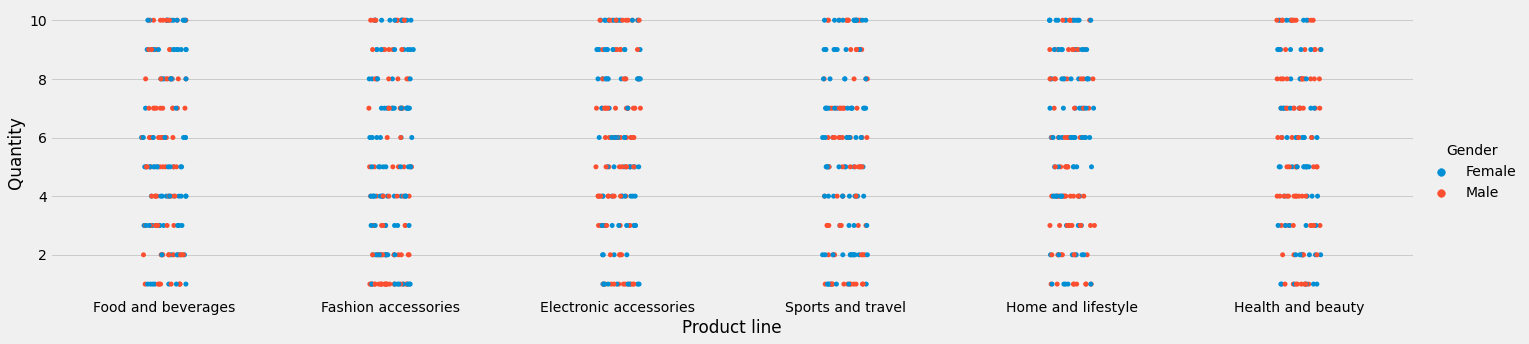

In [52]:
#Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender.
sns.catplot(x='Product line', y='Quantity', hue='Gender', data=df, aspect=4) #.set_title("Sales Records")

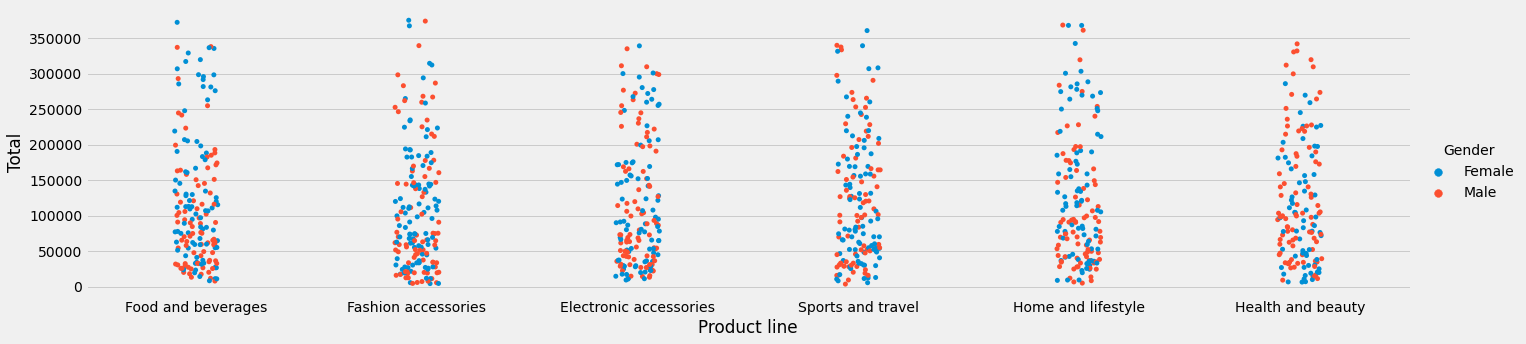

In [53]:
sns.catplot(x='Product line', y='Total', hue='Gender', data=df, aspect=4)

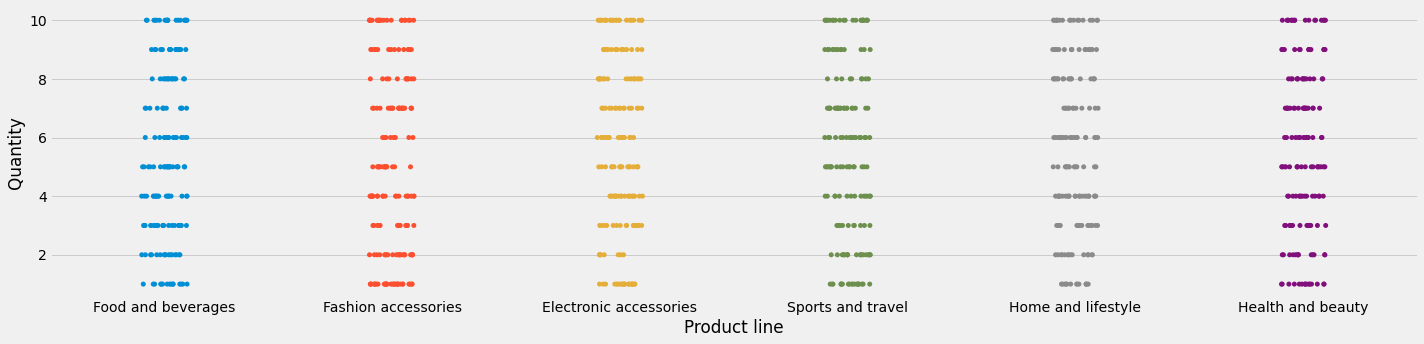

In [62]:
sns.catplot(x='Product line',y='Quantity', units='Product line per unit price',data=df, aspect=4)

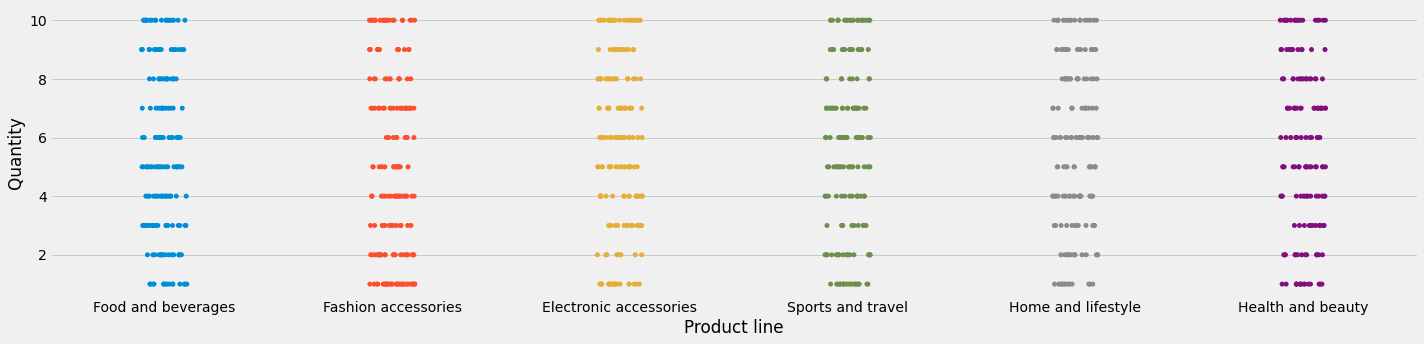

In [63]:
sns.catplot(x='Product line',y='Quantity', units='product line per Quantity', data=df, aspect=4)